# ABOUT:
- this notebook:
    1. Visualises the target features
    2. Explores numeric features
    3. Replaces numeric NAs with **median**
    4. for numeric feature with too many NAs, they are given a **new class**
    5. Used Countplots to visualise the features against the target labels

### import numeric data

In [1]:
import pandas as pd
train_features = pd.read_csv(r"C:\Users\tanch\Documents\Coding Competitions\DataDriven\Flu Shot Learning\local\data\training_set_features.csv")
train_labels = pd.read_csv(r"C:\Users\tanch\Documents\Coding Competitions\DataDriven\Flu Shot Learning\local\data\training_set_labels.csv")
test_features = pd.read_csv(r"C:\Users\tanch\Documents\Coding Competitions\DataDriven\Flu Shot Learning\local\data\test_set_features.csv")
train_features['set'] = "train_features"
test_features['set'] = "test_features"
all_features = pd.concat([train_features,test_features])

In [2]:
from datasets import ClassLabel, Sequence
import pandas as pd
from IPython.display import display, HTML
def show_elements(dataset, randomize = True, num_samples = 10):
    
    if isinstance(dataset,pd.DataFrame):                  # if DataFrame 
        if randomize:                                          # if random> shuffle
            dataset = dataset.sample(frac=1)
        display(HTML(dataset.iloc[:num_samples].to_html()))             # take first n rows
    
    else:                                                    # if not DataFrame
        if randomize:                                           # if random> shuffle
            dataset = dataset.shuffle()   
        dataset = pd.DataFrame(dataset.select(range(num_samples)))   # convert first n rows to dataframe
        display(HTML(dataset.to_html()))
    

In [3]:
show_elements(all_features,randomize = False, num_samples=5)

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,set
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,train_features
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,train_features
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,train_features
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,train_features
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,train_features


## Target feature - countplot
- both target labels are **binary**
- "h1n1_vaccine" is slightly unbalanced although not too severe

<AxesSubplot:xlabel='h1n1_vaccine', ylabel='count'>

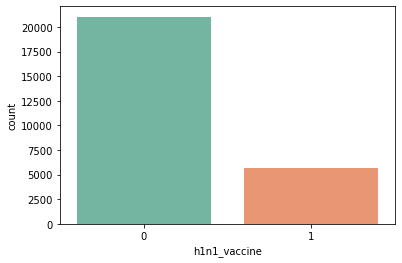

In [4]:
import seaborn as sns
sns.set_palette("Set2")
sns.countplot(data = train_labels , x= "h1n1_vaccine")

<AxesSubplot:xlabel='seasonal_vaccine', ylabel='count'>

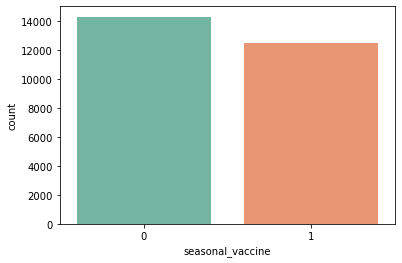

In [5]:
sns.countplot(data = train_labels , x= "seasonal_vaccine")

### Data types
- we can divide the features into two groups categorical and numerical
- the label columns, h1n1_vaccine and seasonal_vaccine, are binary

In [6]:
all_features.dtypes

respondent_id                    int64
h1n1_concern                   float64
h1n1_knowledge                 float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_h1n1               float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_h1n1_vacc_effective    float64
opinion_h1n1_risk              float64
opinion_h1n1_sick_from_vacc    float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                       object
education                       object
race                            object
sex                      

In [7]:
numerical_features = all_features.select_dtypes(["float64","int64"])

## feature_explorer
- it appears that the numerical features are **all integers** (though in the form of floats)
- their cardinality is low and at most 5
- the range is small - spanning from 0 to 5
- all features have NAs, but only **health_insurance feature has a significantly large number of NAs**

In [8]:
def feature_explorer(dataframe):                # expects all numeric columns
    
    colnames = list(dataframe.columns)
    nonNAcount_list = list(dataframe.count())
    NA_percent = np.array(numerical_features.count()/len(numerical_features)).round(3)
    NAcount_list = list(dataframe.isna().sum())
    nunique_list = list(dataframe.nunique())
    mean_list = list(dataframe.mean())
    median_list = list(dataframe.median())
    std_list = list(dataframe.std())
    IQR_list = list(dataframe.quantile(0.75) - dataframe.quantile(0.25))
    min_list = list(dataframe.min())
    max_list = list(dataframe.max())
    dtype_list = list(dataframe.dtypes)
    
    info_df = pd.DataFrame({"colnames":colnames,
                             "nonNA_count":nonNAcount_list,
                            "NA_count" :NAcount_list,
                            "NA_percent":NA_percent,
                             "nunique":nunique_list,
                             "mean":mean_list,
                             "median":median_list,
                             "std":std_list,
                             "IQR":IQR_list,
                             "min":min_list,
                             "max":max_list,
                             "dtype":dtype_list})
    
    display(info_df.style.bar(subset=['nunique'], 
                              color=px.colors.qualitative.Pastel2[0]).bar(subset=['mean'], 
                                                                          color=px.colors.qualitative.Safe[0]).background_gradient(subset=["std"], 
                                                                                                                                   cmap='Greens'))

In [9]:
feature_explorer(numerical_features)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,colnames,nonNA_count,NA_count,NA_percent,nunique,mean,median,std,IQR,min,max,dtype
0,respondent_id,53415,0,1.000000,53415,26707.000000,26707.000000,15419.726651,26707.000000,0.000000,53414.000000,int64
1,h1n1_concern,53238,177,0.997000,4,1.620816,2.000000,0.906534,1.000000,0.000000,3.000000,float64
2,h1n1_knowledge,53177,238,0.996000,3,1.264287,1.000000,0.616881,1.000000,0.000000,2.000000,float64
3,behavioral_antiviral_meds,53265,150,0.997000,2,0.049244,0.000000,0.216380,0.000000,0.000000,1.000000,float64
4,behavioral_avoidance,52994,421,0.992000,2,0.727705,1.000000,0.445145,1.000000,0.000000,1.000000,float64
5,behavioral_face_mask,53377,38,0.999000,2,0.069131,0.000000,0.253679,0.000000,0.000000,1.000000,float64
6,behavioral_wash_hands,53333,82,0.998000,2,0.825849,1.000000,0.379243,0.000000,0.000000,1.000000,float64
7,behavioral_large_gatherings,53256,159,0.997000,2,0.355077,0.000000,0.478541,1.000000,0.000000,1.000000,float64
8,behavioral_outside_home,53251,164,0.997000,2,0.337271,0.000000,0.472783,1.000000,0.000000,1.000000,float64
9,behavioral_touch_face,53159,256,0.995000,2,0.680506,1.000000,0.466285,1.000000,0.000000,1.000000,float64


## Deal with NAs
- with the exception of "health_insurance" feature, which has almost 50% NAs, we replace NAs with median

In [10]:
no_fill_columns = ["health_insurance"]

for col in numerical_features.columns:
    if col not in no_fill_columns:
        median = numerical_features[col].median()
        numerical_features[col].fillna(median,inplace = True)

C:\Users\tanch\anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [11]:
for col in numerical_features.columns:
    try:
        if numerical_features[col].apply(lambda x: round(x)==x).all():
            print(f"All integers:{col}")
    except:
        print(f"Error:{col}")

All integers:respondent_id
All integers:h1n1_concern
All integers:h1n1_knowledge
All integers:behavioral_antiviral_meds
All integers:behavioral_avoidance
All integers:behavioral_face_mask
All integers:behavioral_wash_hands
All integers:behavioral_large_gatherings
All integers:behavioral_outside_home
All integers:behavioral_touch_face
All integers:doctor_recc_h1n1
All integers:doctor_recc_seasonal
All integers:chronic_med_condition
All integers:child_under_6_months
All integers:health_worker
Error:health_insurance
All integers:opinion_h1n1_vacc_effective
All integers:opinion_h1n1_risk
All integers:opinion_h1n1_sick_from_vacc
All integers:opinion_seas_vacc_effective
All integers:opinion_seas_risk
All integers:opinion_seas_sick_from_vacc
All integers:household_adults
All integers:household_children


## health insurance feature
- this feature has too many NAs, we replace NAs with a new category

In [12]:
numerical_features['health_insurance'].fillna("NA",inplace=True)

## Plot Countplots
- Looking at health_insurance plots:
    - NA class has a different distribution of h1n1_vaccine and seasonal_vaccine
    - thus **NA should be its own class**

In [13]:
temp_df = numerical_features.merge(all_features[["respondent_id",'set']])
cleaned_train_set = temp_df[temp_df['set']=="train_features"].merge(train_labels)
cleaned_test_set = temp_df[temp_df['set']=="test_features"]

<IPython.core.display.Javascript object>

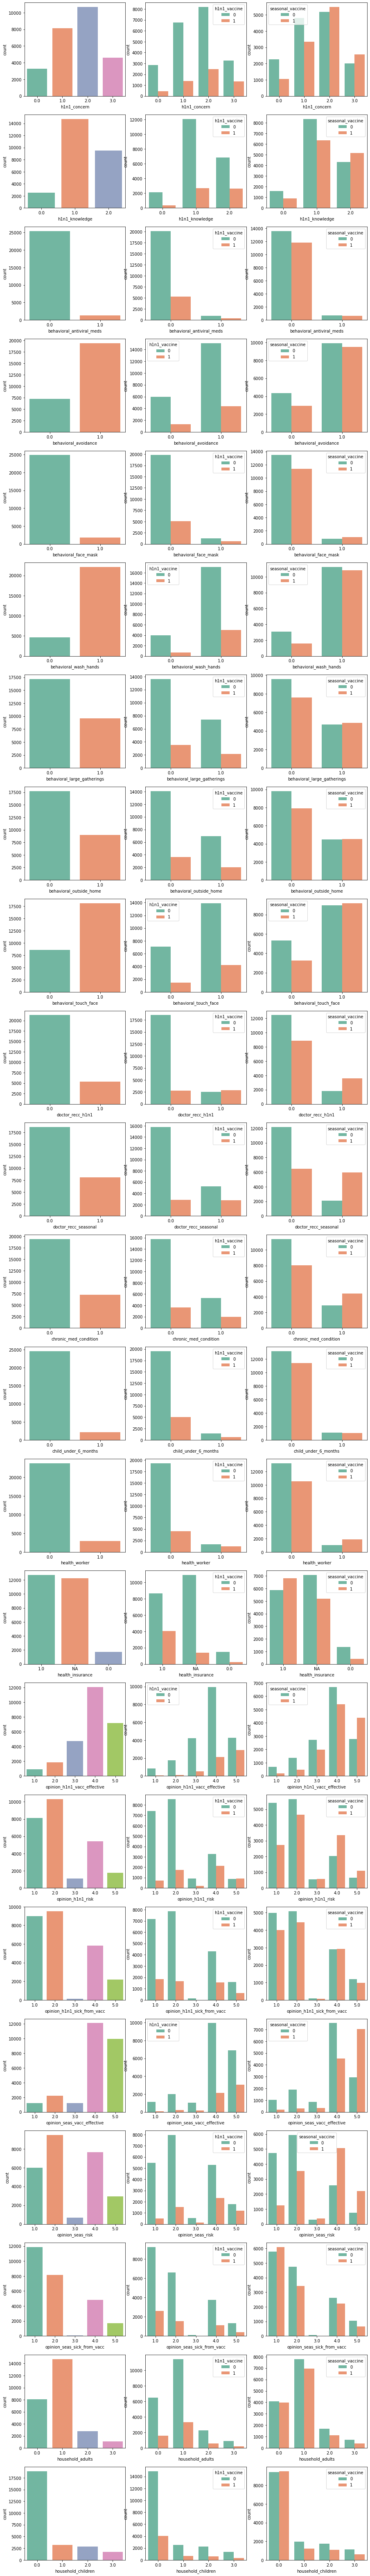

In [52]:
f, axes = plt.subplots(len(numerical_features.columns[1:]), 3,figsize=(15,5*len(numerical_features.columns[1:])))
for i,col in enumerate(numerical_features.columns[1:]):
    sns.countplot(data = cleaned_train_set, x = col, ax = axes[i,0])
    sns.countplot(data = cleaned_train_set, x = col, hue = "h1n1_vaccine", ax = axes[i,1])
    sns.countplot(data = cleaned_train_set, x = col, hue = "seasonal_vaccine", ax = axes[i,2])

## encode health_insurance
- since we deemed NAs to be its own class for health_insurance, we encode it

In [18]:
cleaned_train_set["health_insurance"] = cleaned_train_set["health_insurance"].map(lambda value: 2 if value=="NA" else value)
cleaned_test_set["health_insurance"] = cleaned_test_set["health_insurance"].map(lambda value: 2 if value=="NA" else value)

<ipython-input-18-f2d34cba7b01>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_test_set["health_insurance"] = cleaned_test_set["health_insurance"].map(lambda value: 2 if value=="NA" else value)


## compare_train_test
- test set does not have unexpected values
- train and test features have roughly the same mean, nothing unexpected

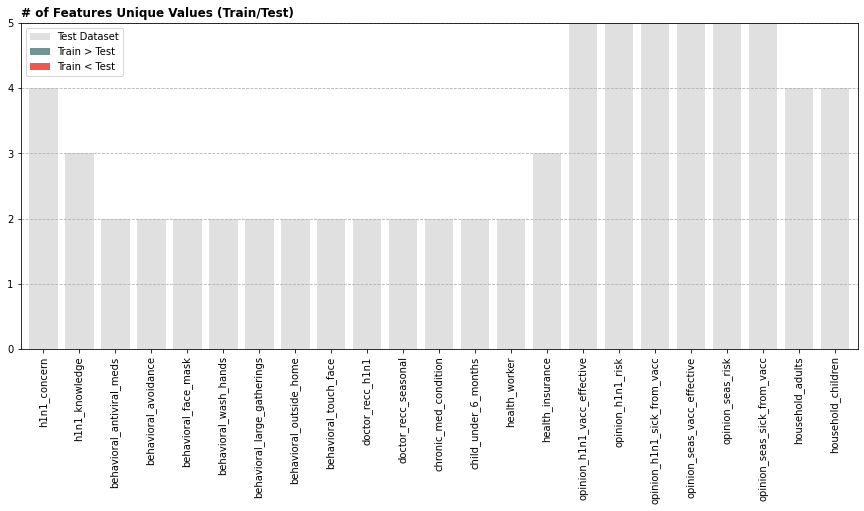

In [54]:
import eda_utilities as eda
eda.compare_train_test_unique_values(cleaned_train_set.iloc[:,1:-3],cleaned_test_set.iloc[:,1:-1])

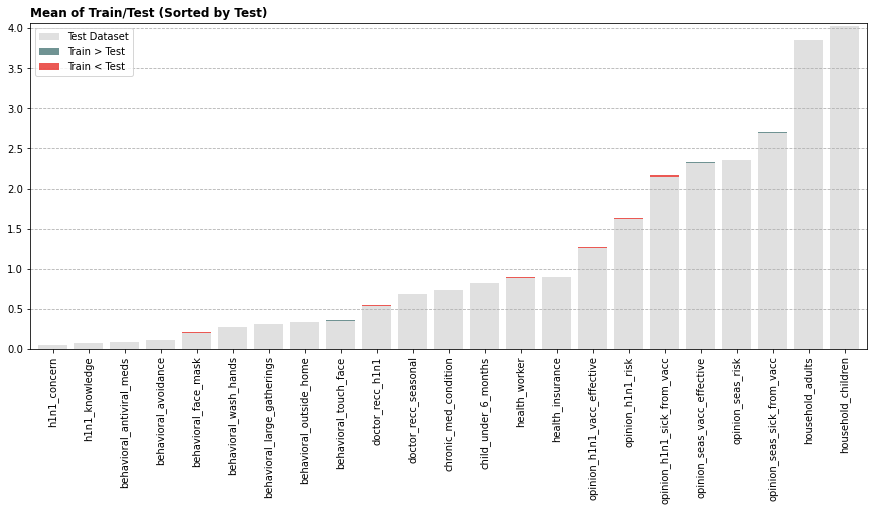

In [29]:
eda.compare_train_test_means(cleaned_train_set.iloc[:,1:-3],cleaned_test_set.iloc[:,1:-1])

## to_csv

In [22]:
cleaned_train_set.drop(["set"],axis=1).set_index("respondent_id").to_csv(r"C:\Users\tanch\Documents\Coding Competitions\DataDriven\Flu Shot Learning\local\data\cleaned_train_set_numerical.csv")

In [23]:
cleaned_test_set.drop(["set"],axis=1).set_index("respondent_id").to_csv(r"C:\Users\tanch\Documents\Coding Competitions\DataDriven\Flu Shot Learning\local\data\cleaned_test_set_numerical.csv")